# Shilpi Dubey
Data Science and Business Analytics intern @GRIP- The Sparks Foundation

### TASK 6
Create the Decision Tree classifier and visualize it graphically.

### Objective:
If we feed any new data to this classifier, it would be able to
predict the right class accordingly.

#### Importing necessary libraries

In [37]:
library(readr)
library(rpart)
library(caret)
library(rpart.plot)
library(ggcorrplot)
library(repr)

#### Importing the dataset

In [39]:
Iris <- read_csv("D:/Learning R/Iris.csv")
head(Iris) # checking first few rows of dataset


-- Column specification --------------------------------------------------------
cols(
  Id = col_double(),
  SepalLengthCm = col_double(),
  SepalWidthCm = col_double(),
  PetalLengthCm = col_double(),
  PetalWidthCm = col_double(),
  Species = col_character()
)



Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


#### Correlation plot of the features 

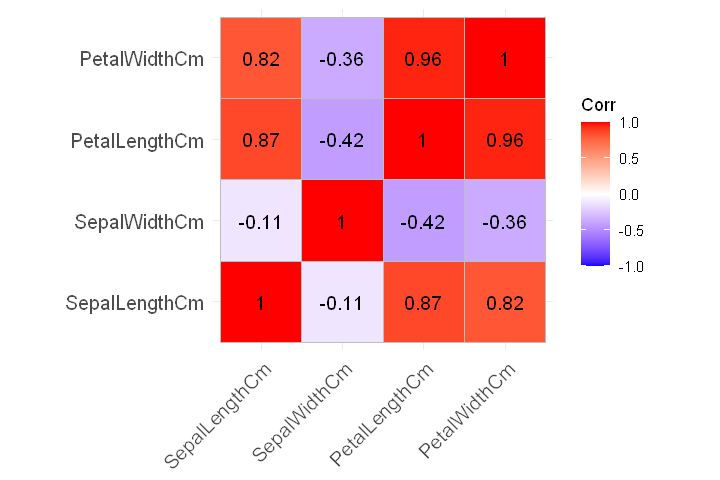

In [11]:
options(repr.plot.width = 6, repr.plot.height = 4) 
ggcorrplot(corr = cor(Iris[,2:5]), lab = TRUE)

#### Splitting the dataset

In [14]:
set.seed(444)
trainingIndex <- createDataPartition(Iris$Species, p=0.8, list = FALSE) # splitting the data in 80/20 set
trainingset <- Iris[trainingIndex,]
testset <- Iris[-trainingIndex,]

Warning message:
"The `i` argument of ``[`()` can't be a matrix as of tibble 3.0.0.
Convert to a vector.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."

#### Creating decision tree classifier

In [15]:
decision_tree <- rpart(data = trainingset, formula = Species ~ SepalLengthCm + SepalWidthCm + PetalLengthCm + PetalWidthCm, 
                       method = "class",
                       control = rpart.control(minsplit = 3, cp=0, maxdepth = 30))
print("Decision tree Classifier Created")

[1] "Decision tree Classifier Created"


In [16]:
summary(decision_tree)

Call:
rpart(formula = Species ~ SepalLengthCm + SepalWidthCm + PetalLengthCm + 
    PetalWidthCm, data = trainingset, method = "class", control = rpart.control(minsplit = 3, 
    cp = 0, maxdepth = 30))
  n= 120 

      CP nsplit rel error xerror       xstd
1 0.5000      0    1.0000 1.2750 0.04889402
2 0.4250      1    0.5000 0.8125 0.06822718
3 0.0250      2    0.0750 0.1250 0.03784563
4 0.0125      3    0.0500 0.1250 0.03784563
5 0.0000      6    0.0125 0.1125 0.03606635

Variable importance
 PetalWidthCm PetalLengthCm SepalLengthCm  SepalWidthCm 
           34            31            21            14 

Node number 1: 120 observations,    complexity param=0.5
  predicted class=Iris-setosa      expected loss=0.6666667  P(node) =1
    class counts:    40    40    40
   probabilities: 0.333 0.333 0.333 
  left son=2 (40 obs) right son=3 (80 obs)
  Primary splits:
      PetalLengthCm < 2.45 to the left,  improve=40.00000, (0 missing)
      PetalWidthCm  < 0.8  to the left,  improve=40.0

#### Predicting on testing data

In [27]:
 prediction <- predict(decision_tree, testset, type = "class")

In [35]:
confMat <- table(Actual_class = testset$Species, Predicted_class = prediction)
confMat

                 Predicted_class
Actual_class      Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0               9              1
  Iris-virginica            0               0             10

In [36]:
accuracy <- sum(diag(confMat))/sum(confMat)
accuracy

[1] 0.9666667

#### Visualizing the decision tree

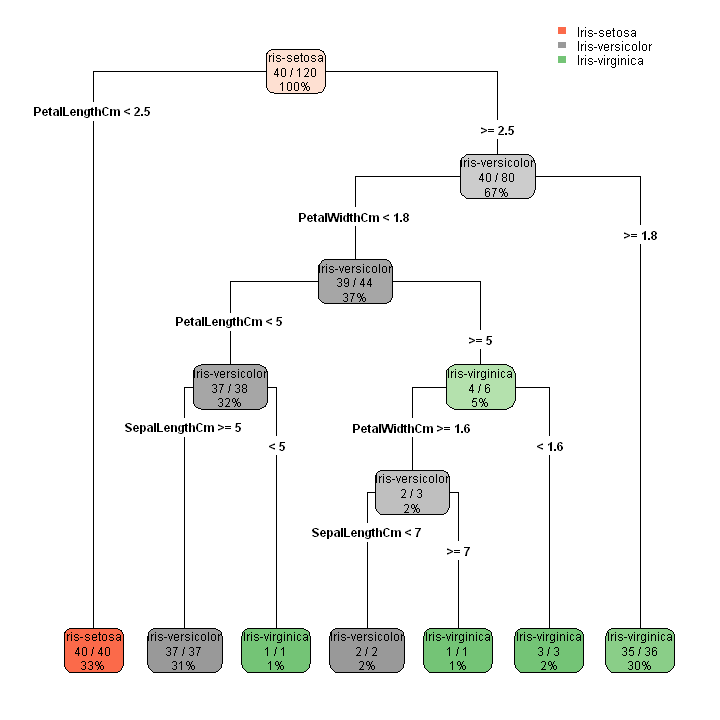

In [18]:
options(repr.plot.width = 6, repr.plot.height = 6) 
rpart.plot(decision_tree, type = 4, extra = 102)

### THANKYOU!